In [18]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import sys, pickle
from classDeclarations import file_data

In [19]:
with open('gathered_data.pkl', "rb") as fp:
    dataset = pickle.load(fp)

In [20]:
file_data_img = dataset[0]
file_data_csv = dataset[1]
file_data_pdf = dataset[2]

print(len(dataset))

3


In [5]:
def combine_1gram_data(file_data):
    one_gram_array = np.empty((0, 0))
   
    for data in file_data:
        if one_gram_array.size == 0:
            one_gram_array = data.one_gram_distr_nonzero
        else:
            one_gram_array = np.vstack((one_gram_array, data.one_gram_distr_nonzero))
    return one_gram_array



In [60]:
one_gram_img = combine_1gram_data(file_data_img)
one_gram_csv = combine_1gram_data(file_data_csv)
one_gram_pdf = combine_1gram_data(file_data_pdf)

print(one_gram_img.shape, one_gram_csv.shape, one_gram_pdf.shape)

(100, 256) (100, 256) (100, 256)


In [61]:
total_dataset = np.vstack((one_gram_img, one_gram_csv, one_gram_pdf))
print(total_dataset.shape)

(300, 256)


In [65]:
new_line = total_dataset[:, 10]
comma = total_dataset[:, 44]

print(new_line.shape, comma.shape)
input_set = np.vstack((new_line, comma)).T
print(input_set.shape)

(300,) (300,)
(300, 2)


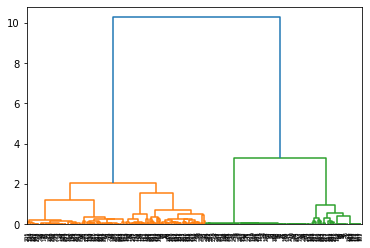

In [73]:
sys.setrecursionlimit(10000)
dendrogram = sch.dendrogram(sch.linkage(total_dataset, method='ward'))

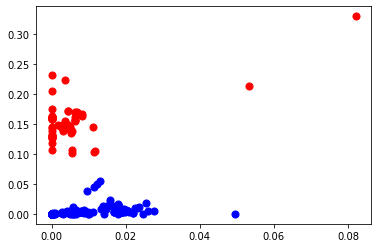

In [67]:
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
model.fit(input_set)
labels = model.labels_

X = input_set
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
#plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')
#plt.scatter(X[labels==3, 0], X[labels==3, 1], s=50, marker='o', color='purple')
#plt.scatter(X[labels==4, 0], X[labels==4, 1], s=50, marker='o', color='orange')
plt.show()

In [112]:
print(X.shape)
print(type(X))
print(len(all_file_data))

(300, 2)
<class 'numpy.ndarray'>
300


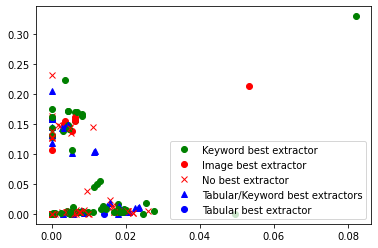

In [123]:
all_file_data = file_data_img + file_data_csv + file_data_pdf
no_best_extractor = True
image_best_extractor = True
tab_best_extractor = True
kw_best_extractor = True
ik_best_extractor = True
tk_best_extractor = True
it_best_extractor = True
all_best_extractor = True
for i in range(X.shape[0]):

    if len(all_file_data[i].best_extractors) == 0:
        plt.plot(X[i][0], X[i][1], "rx", label="No best extractor" if no_best_extractor else "")
        no_best_extractor = False
    elif len(all_file_data[i].best_extractors) == 1 and "Img" in all_file_data[i].best_extractors:
        plt.plot(X[i][0], X[i][1], "ro", label="Image best extractor" if image_best_extractor else "")
        image_best_extractor = False
    elif len(all_file_data[i].best_extractors) == 1 and "Tabular" in all_file_data[i].best_extractors:
        plt.plot(X[i][0], X[i][1], "bo", label="Tabular best extractor" if tab_best_extractor else "")
        tab_best_extractor = False
    elif len(all_file_data[i].best_extractors) == 1 and "Keyword" in all_file_data[i].best_extractors:
        plt.plot(X[i][0], X[i][1], "go", label="Keyword best extractor" if kw_best_extractor else "")
        kw_best_extractor = False
    elif len(all_file_data[i].best_extractors) == 2 and "Img" in all_file_data[i].best_extractors and "Keyword" in all_file_data[i].best_extractors:
        plt.plot(X[i][0], X[i][1], "r^", label="Image/Keyword best extractors" if ik_best_extractor else "")
        ik_best_extractor = False

    elif len(all_file_data[i].best_extractors) == 2 and "Tabular" in all_file_data[i].best_extractors and "Keyword" in all_file_data[i].best_extractors:
        plt.plot(X[i][0], X[i][1], "b^", label="Tabular/Keyword best extractors" if tk_best_extractor else "")
        tk_best_extractor = False

    elif len(all_file_data.best_extractors) == 2 and "Img" in all_file_data[i].best_extractors and "Tabular" in all_file_data[i].best_extractors:
        plt.plot(X[i][0], X[i][1], "g^", label="Img/Tabular best extractors" if it_best_extractor else "")
        it_best_extractor = False

    else:
        plt.plot(X[i][0], X[i][1], "ko", label="All 3 are good extractors" if all_best_extractor else "")
        all_best_extractor = False
  


plt.legend()
plt.show()

### Feature Agglomerations and K-Means clustering

In [30]:
from sklearn.cluster import FeatureAgglomeration, KMeans
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

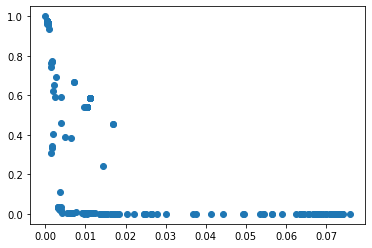

In [72]:
agglo = FeatureAgglomeration(n_clusters=3).fit_transform(total_dataset)
#fig = plt.figure()
#ax = Axes3D(fig)
plt.scatter(agglo[:,0], agglo[:,1])
plt.show()

# 2 gram Analysis

In [21]:
from sklearn.feature_extraction import DictVectorizer
from scipy.sparse import vstack, csr_matrix

In [22]:
def combine_2gram_data(file_data):
    dict_list = []
    for data in file_data:
            dict_list.append(data.two_gram_distr) 
    
    v = DictVectorizer(sparse=False)
    two_gram_array = v.fit_transform(dict_list)
    return two_gram_array

In [23]:
def convert_to_prob_distr(data_input):
    distr = data_input.copy()
    for i in range(distr.shape[0]):
        distr[i] = distr[i] / (np.sum(distr[i]) + np.finfo(float).eps)
    return distr

In [27]:
two_gram_img = combine_2gram_data(file_data_img)
two_gram_csv = convert_to_prob_distr(combine_2gram_data(file_data_csv))
two_gram_pdf = convert_to_prob_distr(combine_2gram_data(file_data_pdf))

print(two_gram_img.shape, two_gram_csv.shape, two_gram_pdf.shape)

(100, 65536) (100, 65536) (100, 65536)


In [25]:
from collections import Counter
def classify(val):
    res = []
    if val > 0:
        res.append("non zero")
    return res

for file_x in file_data_img:
    print(Counter(classification for val in file_x.two_gram_distr.values() for classification in classify(val)))


Counter({'non zero': 101})
Counter({'non zero': 146})
Counter({'non zero': 62407})
Counter({'non zero': 50203})
Counter({'non zero': 49300})
Counter({'non zero': 101})
Counter({'non zero': 49773})
Counter({'non zero': 101})
Counter({'non zero': 126})
Counter({'non zero': 48217})
Counter({'non zero': 147})
Counter({'non zero': 48917})
Counter({'non zero': 101})
Counter({'non zero': 126})
Counter({'non zero': 60350})
Counter({'non zero': 101})
Counter({'non zero': 65519})
Counter({'non zero': 101})
Counter({'non zero': 127})
Counter({'non zero': 49267})
Counter({'non zero': 127})
Counter({'non zero': 127})
Counter({'non zero': 146})
Counter({'non zero': 101})
Counter({'non zero': 139})
Counter({'non zero': 65519})
Counter({'non zero': 101})
Counter({'non zero': 127})
Counter({'non zero': 50246})
Counter({'non zero': 50082})
Counter({'non zero': 49211})
Counter({'non zero': 127})
Counter({'non zero': 146})
Counter({'non zero': 146})
Counter({'non zero': 101})
Counter({'non zero': 48944})


In [28]:
two_grams_total_dataset = np.vstack((two_gram_img, two_gram_csv, two_gram_pdf))
print(two_grams_total_dataset.shape)

(300, 65536)


In [31]:
agglo_2gram = FeatureAgglomeration(n_clusters=3).fit_transform(two_grams_total_dataset)


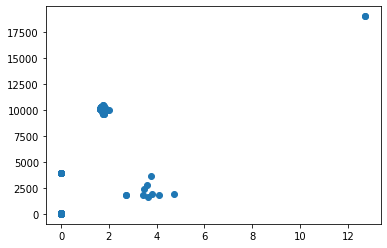

In [33]:
#fig = plt.figure()
#ax = Axes3D(fig)
plt.scatter(agglo_2gram[:,0], agglo_2gram[:,1])
plt.show()

In [35]:
print(np.count_nonzero(two_g))

0


In [34]:
agglo_2gram_2_clust = FeatureAgglomeration(n_clusters=2).fit_transform(two_grams_total_dataset)


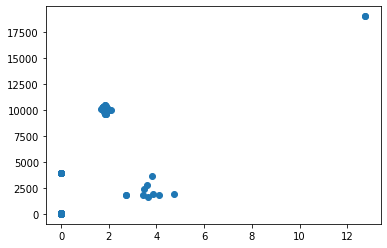

In [35]:
plt.scatter(agglo_2gram_2_clust[:,0], agglo_2gram_2_clust[:,1])
plt.show()

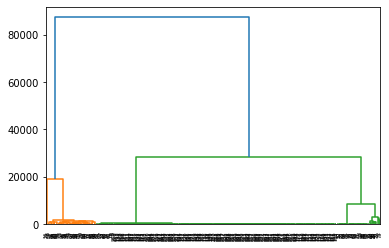

In [36]:
dendro2gram = sch.dendrogram(sch.linkage(two_grams_total_dataset, method='ward'))

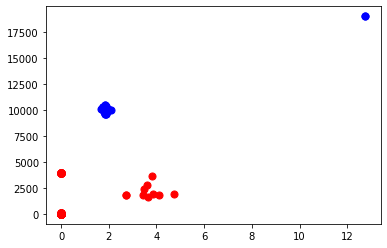

In [37]:
model_2gram = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
model_2gram.fit(agglo_2gram_2_clust)
labels_2gram = model_2gram.labels_

Y = agglo_2gram_2_clust
plt.scatter(Y[labels_2gram==0, 0], Y[labels_2gram==0, 1], s=50, marker='o', color='red')
plt.scatter(Y[labels_2gram==1, 0], Y[labels_2gram==1, 1], s=50, marker='o', color='blue')

In [51]:
def plot_extractors(Y):

    all_file_data = file_data_img + file_data_csv + file_data_pdf
    no_best_extractor = True
    image_best_extractor = True
    tab_best_extractor = True
    kw_best_extractor = True
    ik_best_extractor = True
    tk_best_extractor = True
    it_best_extractor = True
    all_best_extractor = True
    for i in range(Y.shape[0]):

        if len(all_file_data[i].best_extractors) == 0:
            plt.plot(Y[i][0], Y[i][1], "rx", label="No best extractor" if no_best_extractor else "")
            no_best_extractor = False
        elif len(all_file_data[i].best_extractors) == 1 and "Img" in all_file_data[i].best_extractors:
            plt.plot(Y[i][0], Y[i][1], "ro", label="Image best extractor" if image_best_extractor else "")
            image_best_extractor = False
        elif len(all_file_data[i].best_extractors) == 1 and "Tabular" in all_file_data[i].best_extractors:
            plt.plot(Y[i][0], Y[i][1], "bo", label="Tabular best extractor" if tab_best_extractor else "")
            tab_best_extractor = False
        elif len(all_file_data[i].best_extractors) == 1 and "Keyword" in all_file_data[i].best_extractors:
            plt.plot(Y[i][0], Y[i][1], "go", label="Keyword best extractor" if kw_best_extractor else "")
            kw_best_extractor = False
        elif len(all_file_data[i].best_extractors) == 2 and "Img" in all_file_data[i].best_extractors and "Keyword" in all_file_data[i].best_extractors:
            plt.plot(Y[i][0], Y[i][1], "r^", label="Image/Keyword best extractors" if ik_best_extractor else "")
            ik_best_extractor = False

        elif len(all_file_data[i].best_extractors) == 2 and "Tabular" in all_file_data[i].best_extractors and "Keyword" in all_file_data[i].best_extractors:
            plt.plot(Y[i][0], Y[i][1], "b^", label="Tabular/Keyword best extractors" if tk_best_extractor else "")
            tk_best_extractor = False

        elif len(all_file_data.best_extractors) == 2 and "Img" in all_file_data[i].best_extractors and "Tabular" in all_file_data[i].best_extractors:
            plt.plot(Y[i][0], Y[i][1], "g^", label="Img/Tabular best extractors" if it_best_extractor else "")
            it_best_extractor = False

        else:
            plt.plot(Y[i][0], Y[i][1], "ko", label="All 3 are good extractors" if all_best_extractor else "")
            all_best_extractor = False
    plt.legend()
    plt.show()
  

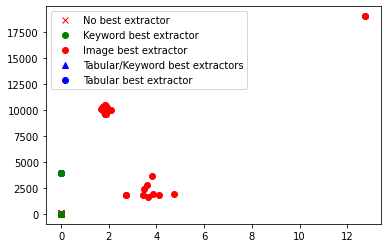

In [42]:
plot_extractors()

# Try some PCA

In [44]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

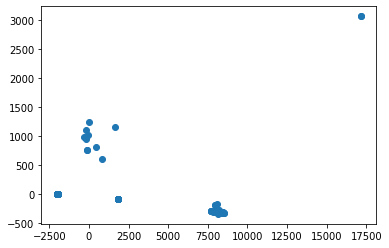

In [49]:
pca = PCA(n_components=2).fit_transform(two_grams_total_dataset)
plt.scatter(pca[:,0], pca[:,1])
plt.show()

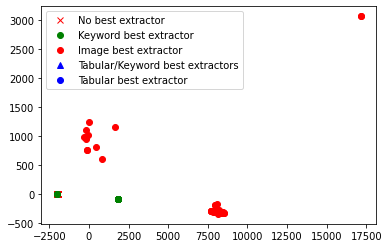

In [52]:
plot_extractors(pca)

[[ 8499.35496067  -148.64720942]
 [-1499.88616953    26.23186049]]


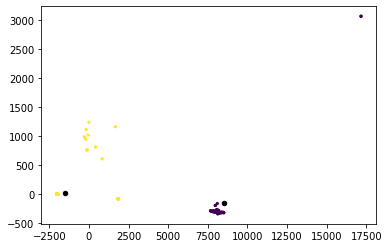

In [54]:
kmeans = KMeans(n_clusters=2)
data_pred = kmeans.fit_predict(pca)
plt.scatter(pca[:, 0], pca[:,1], c=data_pred, s=5, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=20, alpha=1)
print(centers)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4)
data_pred = kmeans.fit_predict(agglo)
ax.scatter(agglo[:, 0], agglo[:, 1], agglo[:,2], c=data_pred, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='black', s=200, alpha=1)
plt.show()